In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from artificial_data import get_degree_dist
from cada import cada
from sklearn.metrics import f1_score

n_default = 100000
n_ls = 1000*np.array([1,2,5,10,20,50,100,200,500])
p_ls = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]

#Try to tune algs if needed

In [2]:
#Read data
pr_graphs = []
for p in p_ls:
    path = f"art_data/artdat-p{p}.txt"
    pr_graphs.append(nx.read_adjlist(path,nodetype=int))

n_graphs = []
for n in n_ls:
    path = f"art_data/artdat-n{n}.txt"
    n_graphs.append(nx.read_adjlist(path,nodetype=int))


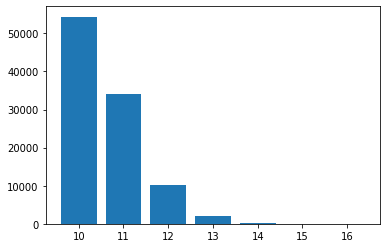

In [3]:
#Over look of degree_distributions
val,cnt = get_degree_dist(pr_graphs[2])
#print(val)
#print(cnt)
plt.bar(val,cnt)
plt.show()

Calculate f1-score

In [4]:
pr_f1 = []
n_inj = int(n_default/100)
ground_truth = np.zeros(len(pr_graphs[0]))
ground_truth[n_default:] = 1
for ind,pr_g in enumerate(pr_graphs):
    #reg_nodes = pr_g[:n_default]
    #inj_nodes = pr_g[n_default:]
    
    #Train cada
    cada_lv = cada(pr_g)
    pred = cada_lv.clf(n_inj)
    pr_f1.append(f1_score(ground_truth,pred))
    print(pr_f1[ind])
    #Evaluate cada

    


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [4]:
#Test things...
#apa = cada(n_graphs[0])
#bapa = [int(a[0]) for a in apa.anomaly_scores]
#print(bapa)
#print(pr_graphs[0].nodes)
n_inj = int(n_default/100)
ground_truth = np.zeros(len(pr_graphs[0]),dtype=int)
ground_truth[n_default:] = 1
#print(sum(ground_truth))
#va fan e felet...
cada_lv = cada(pr_graphs[0])
pred = cada_lv.clf(n_inj)
print(f1_score(ground_truth,pred))

1.0
